In [59]:
set = '''
e + CH4 => e + CH3 + H
e + CH4 => e + CH2 + H2
e + C2H6 => e + C2H4 + H2
e + C2H5^+ => C2H3 + H + H
e + C2H4 => e + C2H2 + H2
e + C2H5^+ => C2H2 + H2 + H
e + C3H6 => e + C2H2 + CH4
e + C2H5^+ => C2H2 + H + H + H
e + C2H4 => e + C2H3 + H
e + C3H8 => e + C3H6 + H2
e + CH4 => e + CH + H2 + H
e + CH => e + C + H
CH3 + H => CH4
CH3 + CH3 => C2H6
C2H4 + H => C2H5
CH + CH4 => C2H4 + H
C2H5 + H => C2H6
C2H5 + C2H5 => C4H10
CH2 + H => CH + H2
CH2 + CH3 => C2H4 + H
C2H5 + H => CH3 + CH3
CH4 + CH4^+ => CH3 + CH5^+
CH3 + C2H5 => C3H8
CH3 + C2H3 => C3H6
C3H6 + H => C3H7
C4H10 + CH2 => C5H12
C3H7 + H2 => C3H8 + H
C2H6 + CH5^+ => CH4 + H2 + C2H5^+
C2H4 + CH5^+ => CH4 + C2H5^+
C3H7 + H => C3H8
C2H3 + H => C2H2 + H2
C3H8 + CH2 => C4H9H
CH4 + CH3^+ => H2 + C2H5^+
H + H => H2
'''

In [60]:
import pandas as pd

reactions = set.split('\n')
filtered_reactions = [reaction for reaction in reactions if reaction.strip() != '']
df_reactions = pd.DataFrame(filtered_reactions, columns=['Reactions'])

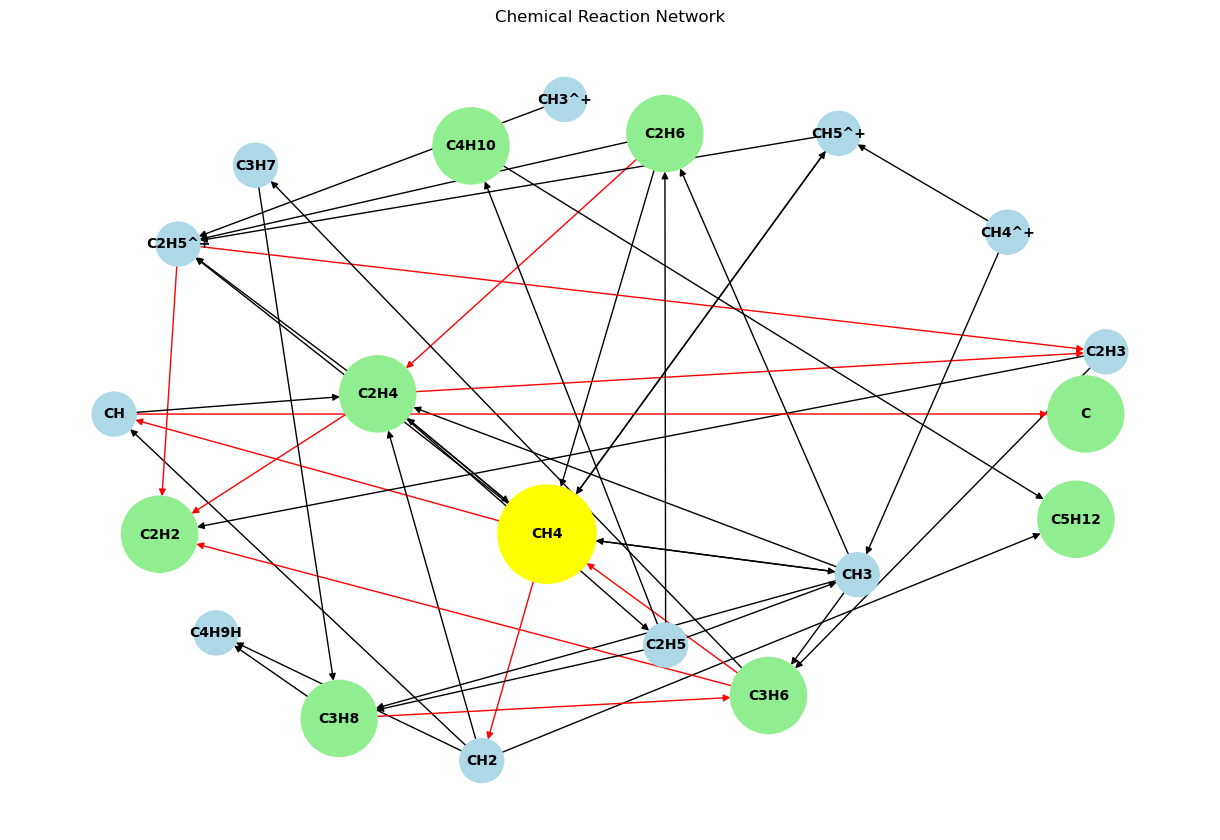

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

# 화학반응 네트워크 생성
G = nx.DiGraph()

# 각 반응식을 그래프에 추가
for reaction in df_reactions['Reactions']:
    reactants, products = reaction.split('=>')
    reactants = reactants.strip().split(' + ')
    products = products.strip().split(' + ')
    
    # e 성분과 H, H2 성분을 무시하고 추가
    filtered_reactants = [r for r in reactants if r.strip() not in ['e', 'H', 'H2']]
    filtered_products = [p for p in products if p.strip() not in ['e', 'H', 'H2']]
    
    # e가 포함된 반응인지 확인
    if 'e' in reactants:
        edge_color = 'red'
    else:
        edge_color = 'black'
    
    for reactant in filtered_reactants:
        for product in filtered_products:
            G.add_edge(reactant.strip(), product.strip(), color=edge_color)

# 네트워크 시각화
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=2.0)  # 노드 간의 간격을 더 벌림

# 노드 색상 및 크기 설정
node_color = ['yellow' if node == 'CH4' else 'lightgreen' if node in ['C2H6', 'C2H4', 'C2H2', 'C3H8', 'C3H6', 'C4H10', 'C5H12', 'C'] else 'lightblue' for node in G.nodes()]
node_size = [5000 if node == 'CH4' else 3000 if node in ['C2H6', 'C2H4', 'C2H2', 'C3H8', 'C3H6', 'C4H10', 'C5H12', 'C'] else 1000 for node in G.nodes()]

# 엣지 색상 설정
edge_colors = [G[u][v]['color'] for u, v in G.edges()]

nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=node_color, font_size=10, font_weight='bold', arrows=True, edge_color=edge_colors)
plt.title('Chemical Reaction Network')
plt.show()